In [1]:
# @itsvenu_
# MultipleLinearRegression

# All-in
# Backward elimination
# Forward selection
# Bidirectional elimination
# Score comparison

# compare metrics of different models: MSE, R2_score

In [21]:
import pandas as pd
import numpy as np; np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [3]:
# train an MLR model to predict Profits given 4 features
dat = pd.read_csv("../../data/50_Startups.csv")
dat.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dat.shape

(50, 5)

In [5]:
# uniq values in State
# create dummy variables
dat.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
# we don't need to make `n_dummy - 1` for dummy variables
# multipleLinearRegression from sklearn takes care of it

dat_encoded = pd.get_dummies(dat, columns=['State'])
dat_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [7]:
X = dat_encoded.drop(['Profit'], axis=1).values
X[:5]

array([[1.65e+05, 1.37e+05, 4.72e+05, 0.00e+00, 0.00e+00, 1.00e+00],
       [1.63e+05, 1.51e+05, 4.44e+05, 1.00e+00, 0.00e+00, 0.00e+00],
       [1.53e+05, 1.01e+05, 4.08e+05, 0.00e+00, 1.00e+00, 0.00e+00],
       [1.44e+05, 1.19e+05, 3.83e+05, 0.00e+00, 0.00e+00, 1.00e+00],
       [1.42e+05, 9.14e+04, 3.66e+05, 0.00e+00, 1.00e+00, 0.00e+00]])

In [8]:
Y = dat_encoded.Profit.values
Y[:5]

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94])

In [9]:
# now split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(40, 6)
(40,)
(10, 6)
(10,)


In [10]:
# train the model
mlr = LinearRegression()

In [11]:
mlr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
Y_pred = mlr.predict(X_test)

Text(0.5, 1.0, 'Training data')

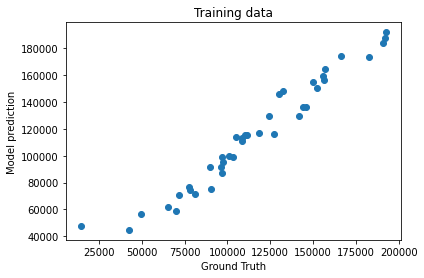

In [13]:
plt.scatter(Y_train, mlr.predict(X_train))
plt.xlabel('Ground Truth')
plt.ylabel('Model prediction')
plt.title("Training data")

In [14]:
# check test-data results
Y_test_predicted = np.concatenate((Y_test.reshape(len(Y_test), 1), Y_pred.reshape(len(Y_pred), 1)), axis=1)

In [15]:
model_performance = pd.DataFrame(Y_test_predicted, columns=['GroundTruth', 'ModelPrediction'])
model_performance

,GroundTruth,ModelPrediction
0,134307.35,126362.879083
1,81005.76,84608.453836
2,99937.59,99677.494251
3,64926.08,46357.460686
4,125370.37,128750.482885
5,35673.41,50912.417419
6,105733.54,109741.350327
7,107404.34,100643.242816
8,97427.84,97599.275746
9,122776.86,113097.425244


In [70]:
model_performance['GroundTruth'].corr(model_performance['ModelPrediction'])

0.9499140824996575

In [20]:
model_r2_score = r2_score(Y_test, Y_pred)
print("Raw model performace: " + str(model_r2_score))

Raw model performace: 0.8987266414329448


#### Recursive Feature Elimination [Backward elimination]

This is to identify most predictive features by iteratively eliminating least predictive features.

Let's try this appraoch and see if we can improve the coefficient of determination (R2 score) to >0.9.

In [23]:
mlr_estimator = LinearRegression()
selector = RFE(estimator=mlr_estimator, n_features_to_select=2, step=1, verbose=1)

In [24]:
selector.fit(X_train, Y_train)

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=2, step=1, verbose=1)

In [35]:
selector.support_

# it kept last two binary/dummy variables as most predictive ones, which is a bit weird
# It is also possible that place only can determine the profits
# Let's evaluate the model with coefficient of determination

array([False, False, False, False,  True,  True])

In [36]:
selector.ranking_

array([3, 4, 5, 2, 1, 1])

In [37]:
Y_RFE_pred = selector.predict(X_test)

In [33]:
r2_score(Y_train, selector.predict(X_train))

0.04098934255840325

In [39]:
r2_score(Y_test, Y_RFE_pred)

-0.5917166005474785

so the model trained with only 2 features is performing very bad.

This is the reason we need to be very careful with ML models, always keep the model as simple as possible.

Just for leaning purpose, one can also train a model with combining RFE and cross validations